# Step-1: Loading the Dataset and the necessary libraries & function classess

## Load the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

## Load the csv file

In [5]:
data = pd.read_csv('tsa_ty.csv')

## Summary of the dataset

### First 5 rows

In [8]:
data.head()

,year_ending_on,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,mandays_worked,no_of_employees,mandays_employees,...,interest_paid,net_income,net_fixed_capital_formation,gross_fixed_capital_formation,addn_raw_mat_fuel,addn_semi_finished,addn_finished,addn_total,gross_capital_formation,profit
0,31-03-1994,121594,2244133300000,871085700000,3205471500000,1627134000000,6632323,2045434000,8707909,2726927000,...,234553500000,631653500000,107684100000,272234800000,36883500000,7018600000,11269500000,55171500000,327406400000,285985800000
1,31-03-1995,123010,2776451200000,872963200000,3875345900000,2063710300000,6970116,2163012000,9102407,2854829000,...,267824000000,793895200000,408471600000,595224600000,101581300000,20514200000,54369800000,176465300000,771689800000,372075000000
2,31-03-1996,134571,3484677300000,1076631300000,4899692500000,2469336500000,7632297,2393812000,10044697,3196414000,...,358880600000,996340700000,454940100000,691198700000,99741800000,34103600000,81198500000,215043900000,906242600000,440470600000
3,31-03-1997,132814,3800443900000,1716593100000,5221541300000,2596088400000,7208143,2303625000,9448643,3037414000,...,399443700000,988648300000,524612700000,799365900000,51071700000,11589700000,74999500000,137660900000,937026800000,419784400000
4,31-03-1998,136012,4230822700000,1546165800000,5768260300000,3246051200000,7652254,#VALUE!,9997573,#VALUE!,...,456070000000,1166497300000,404984400000,722708500000,22586500000,11859500000,63219500000,97665500000,820373900000,544561200000


### Data Types of each column

In [10]:
data.dtypes

year_ending_on                   object
no_of_factories                   int64
fixed_capital                     int64
working_capital                   int64
invested_capital                  int64
outstanding_loans                 int64
no_of_workers                     int64
mandays_worked                   object
no_of_employees                  object
mandays_employees                object
total_persons_engaged            object
wages_workers                     int64
total_emoluments                  int64
pf_esi_others                    object
staff_welfare                    object
fuel_consumed                     int64
material_consumed                 int64
total_input                       int64
products_by_products              int64
output                            int64
depreciation                      int64
nva                               int64
gva                               int64
rent_paid                         int64
interest_paid                     int64


# Step-2: Cleaning of the Dataset

## Convert year_ending_on to datetime and set as index

In [13]:
data['year_ending_on'] = pd.to_datetime(data['year_ending_on'], format = 'mixed')
data.set_index('year_ending_on', inplace=True)

## Convert mandays_worked & total_persons_engaged from object to integer

In [15]:
for columns in ['mandays_worked', 'no_of_employees', 'mandays_employees', 'total_persons_engaged', 'pf_esi_others', 'staff_welfare']:
    data[columns] = pd.to_numeric(data[columns], errors = 'coerce')

## Check for misssing values

In [17]:
data.isnull().sum()

no_of_factories                  0
fixed_capital                    0
working_capital                  0
invested_capital                 0
outstanding_loans                0
no_of_workers                    0
mandays_worked                   2
no_of_employees                  1
mandays_employees                2
total_persons_engaged            1
wages_workers                    0
total_emoluments                 0
pf_esi_others                    1
staff_welfare                    2
fuel_consumed                    0
material_consumed                0
total_input                      0
products_by_products             0
output                           0
depreciation                     0
nva                              0
gva                              0
rent_paid                        0
interest_paid                    0
net_income                       0
net_fixed_capital_formation      0
gross_fixed_capital_formation    0
addn_raw_mat_fuel                0
addn_semi_finished  

## Fill missing values with forward fill for time series continuity

In [19]:
data.fillna(method = 'ffill', inplace = True)

C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\757298848.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = 'ffill', inplace = True)


## Summary of the cleaned data

### Confirming that there are no missing values

In [22]:
data.isnull().sum()

no_of_factories                  0
fixed_capital                    0
working_capital                  0
invested_capital                 0
outstanding_loans                0
no_of_workers                    0
mandays_worked                   0
no_of_employees                  0
mandays_employees                0
total_persons_engaged            0
wages_workers                    0
total_emoluments                 0
pf_esi_others                    0
staff_welfare                    0
fuel_consumed                    0
material_consumed                0
total_input                      0
products_by_products             0
output                           0
depreciation                     0
nva                              0
gva                              0
rent_paid                        0
interest_paid                    0
net_income                       0
net_fixed_capital_formation      0
gross_fixed_capital_formation    0
addn_raw_mat_fuel                0
addn_semi_finished  

### Checking the modified dataypes

In [24]:
data.dtypes

no_of_factories                    int64
fixed_capital                      int64
working_capital                    int64
invested_capital                   int64
outstanding_loans                  int64
no_of_workers                      int64
mandays_worked                   float64
no_of_employees                  float64
mandays_employees                float64
total_persons_engaged            float64
wages_workers                      int64
total_emoluments                   int64
pf_esi_others                    float64
staff_welfare                    float64
fuel_consumed                      int64
material_consumed                  int64
total_input                        int64
products_by_products               int64
output                             int64
depreciation                       int64
nva                                int64
gva                                int64
rent_paid                          int64
interest_paid                      int64
net_income      

### View the cleaned dataset

In [26]:
data.head()

,no_of_factories,fixed_capital,working_capital,invested_capital,outstanding_loans,no_of_workers,mandays_worked,no_of_employees,mandays_employees,total_persons_engaged,...,interest_paid,net_income,net_fixed_capital_formation,gross_fixed_capital_formation,addn_raw_mat_fuel,addn_semi_finished,addn_finished,addn_total,gross_capital_formation,profit
year_ending_on,,,,,,,,,,,,,,,,,,,,,
1994-03-31,121594,2244133300000,871085700000,3205471500000,1627134000000,6632323,2.045434e+09,8707909.0,2.726927e+09,8837716.0,...,234553500000,631653500000,107684100000,272234800000,36883500000,7018600000,11269500000,55171500000,327406400000,285985800000
1995-03-31,123010,2776451200000,872963200000,3875345900000,2063710300000,6970116,2.163012e+09,9102407.0,2.854829e+09,9227097.0,...,267824000000,793895200000,408471600000,595224600000,101581300000,20514200000,54369800000,176465300000,771689800000,372075000000
1996-03-31,134571,3484677300000,1076631300000,4899692500000,2469336500000,7632297,2.393812e+09,10044697.0,3.196414e+09,10222169.0,...,358880600000,996340700000,454940100000,691198700000,99741800000,34103600000,81198500000,215043900000,906242600000,440470600000
1997-03-31,132814,3800443900000,1716593100000,5221541300000,2596088400000,7208143,2.303625e+09,9448643.0,3.037414e+09,9536282.0,...,399443700000,988648300000,524612700000,799365900000,51071700000,11589700000,74999500000,137660900000,937026800000,419784400000
1998-03-31,136012,4230822700000,1546165800000,5768260300000,3246051200000,7652254,2.303625e+09,9997573.0,3.037414e+09,10073485.0,...,456070000000,1166497300000,404984400000,722708500000,22586500000,11859500000,63219500000,97665500000,820373900000,544561200000


# Step-3: Trend Analysis

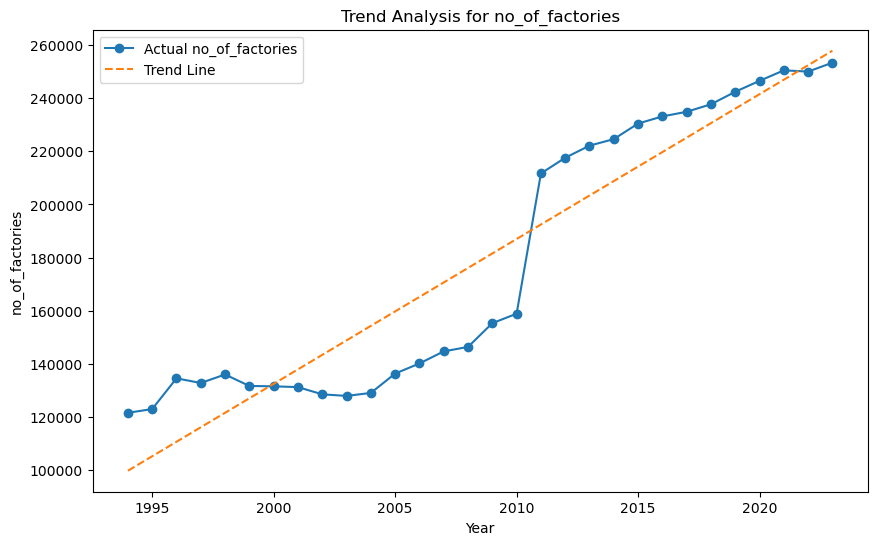

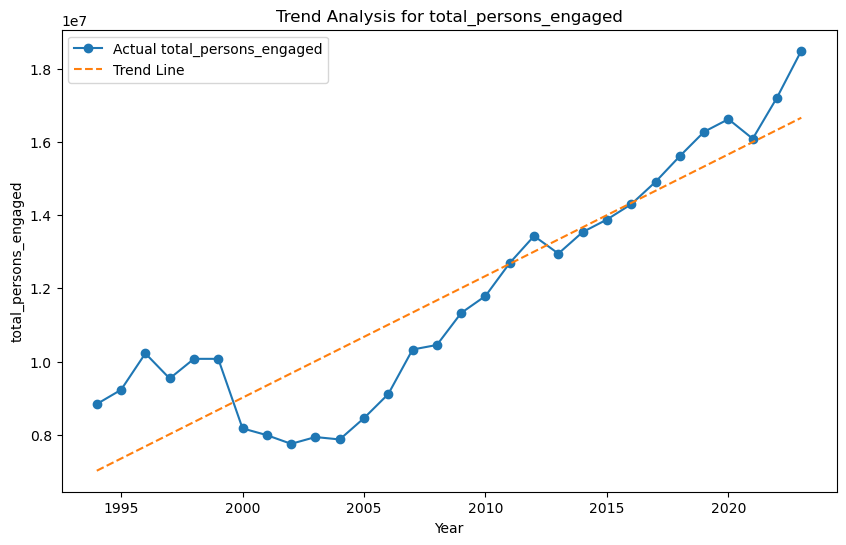

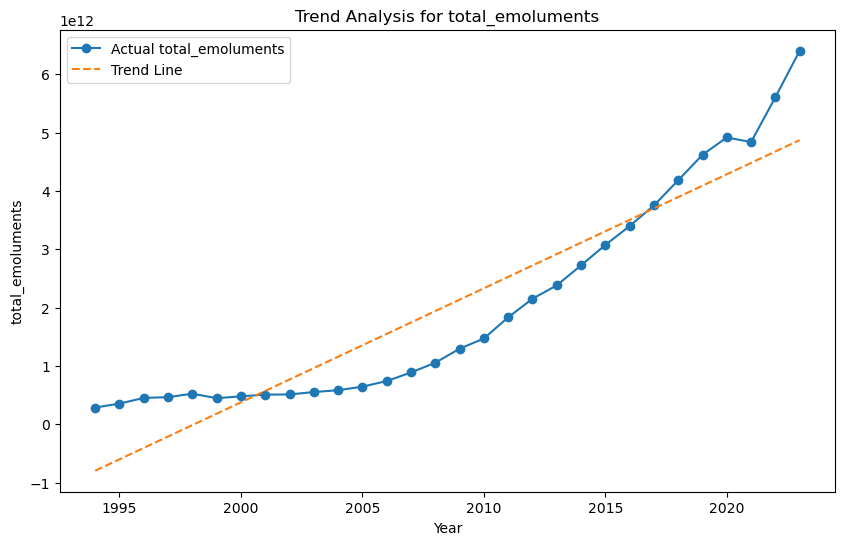

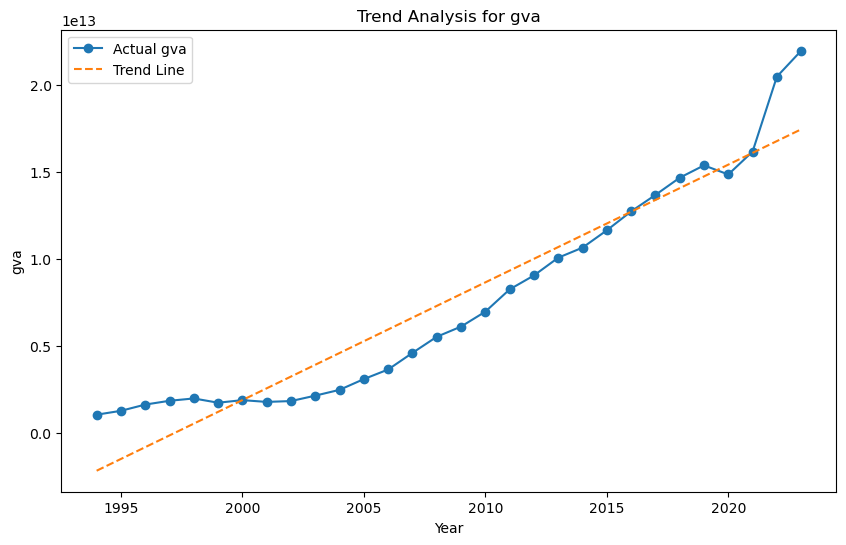

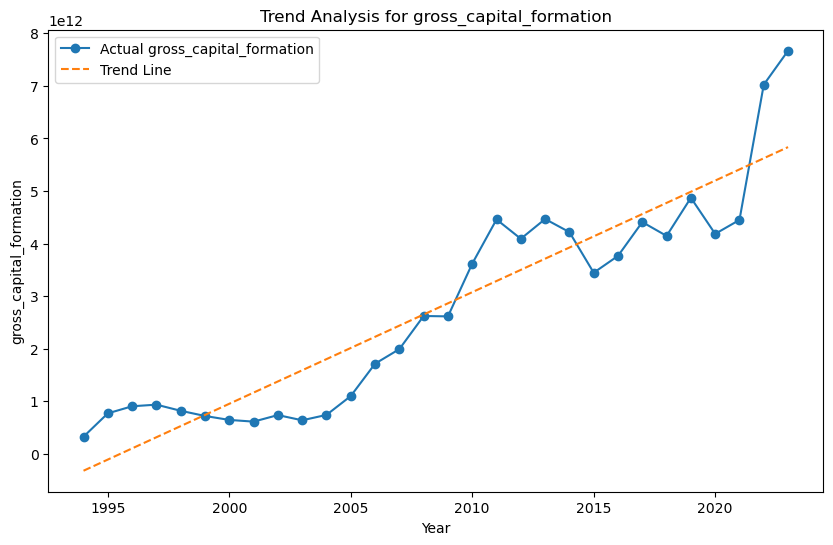

In [28]:
def plot_trend(data, column):
    X = np.array(data.index.year).reshape(-1, 1)
    y = data[column].values

    model = LinearRegression()
    model.fit(X, y)
    
    trend = model.predict(X)

    plt.figure(figsize = (10, 6))
    plt.plot(data.index.year, y, label = f'Actual {column}', marker = 'o')
    plt.plot(data.index.year, trend, label = 'Trend Line', linestyle = '--')
    plt.title(f'Trend Analysis for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

for column in ['no_of_factories', 'total_persons_engaged', 'total_emoluments', 'gva', 'gross_capital_formation']:
    plot_trend(data, column)

# Step-4: Moving Average Smoothing

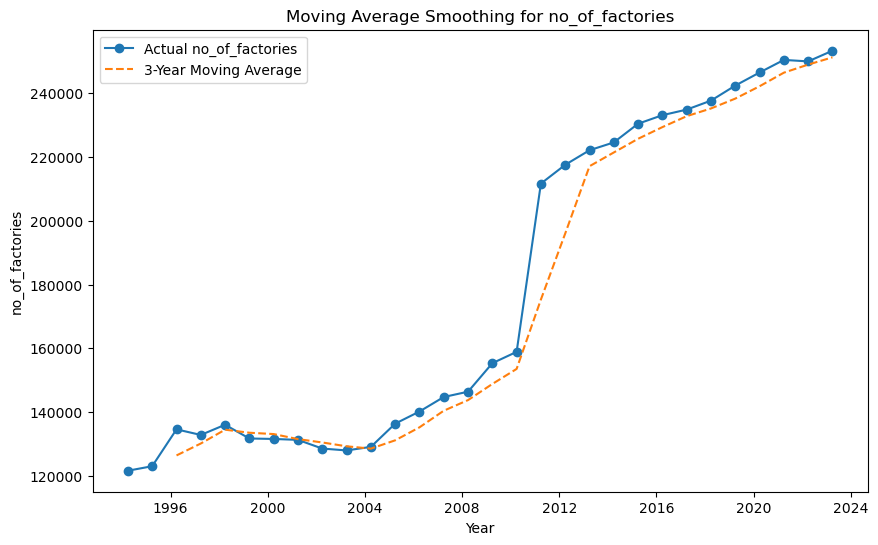

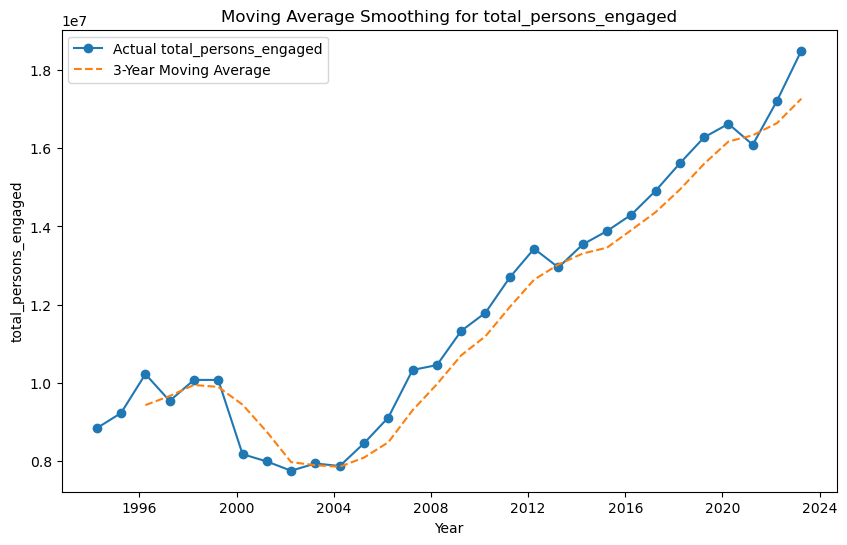

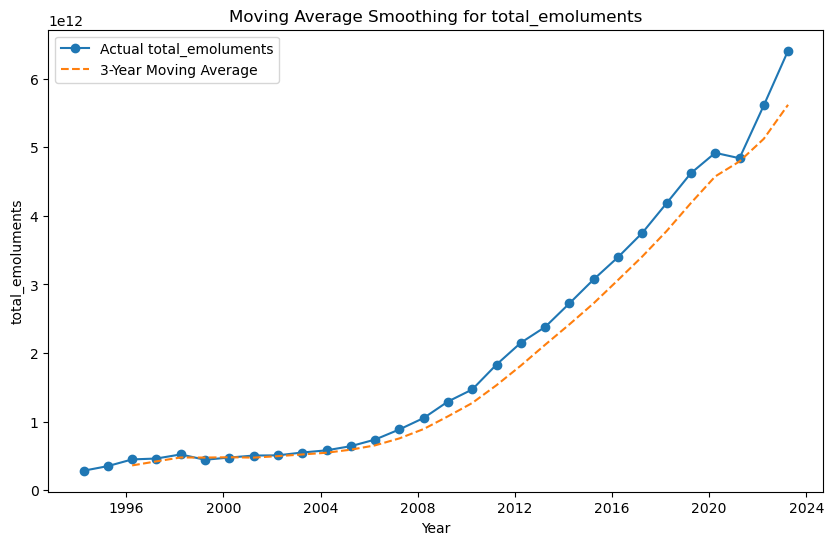

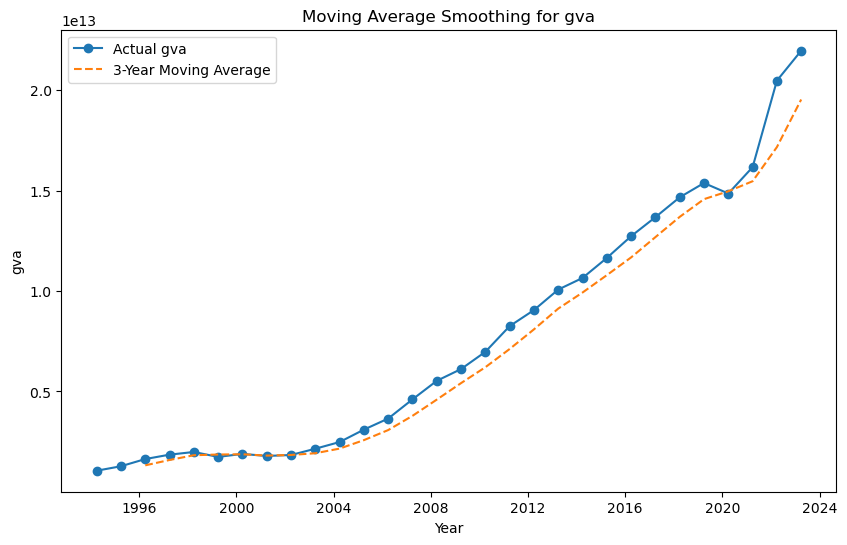

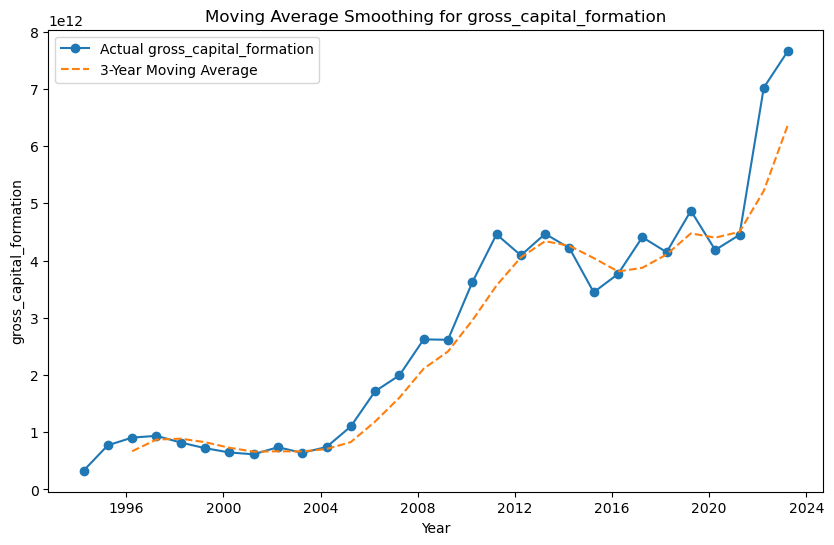

In [30]:
def plot_moving_average(data, column, window = 3):
    rolling_mean = data[column].rolling(window=window).mean()
    
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[column], label = f'Actual {column}', marker = 'o')
    plt.plot(data.index, rolling_mean, label = f'{window}-Year Moving Average', linestyle = '--')
    plt.title(f'Moving Average Smoothing for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()

for column in ['no_of_factories', 'total_persons_engaged', 'total_emoluments', 'gva', 'gross_capital_formation']:
    plot_moving_average(data, column, window = 3)

# Step-5: Growth Rate Analysis

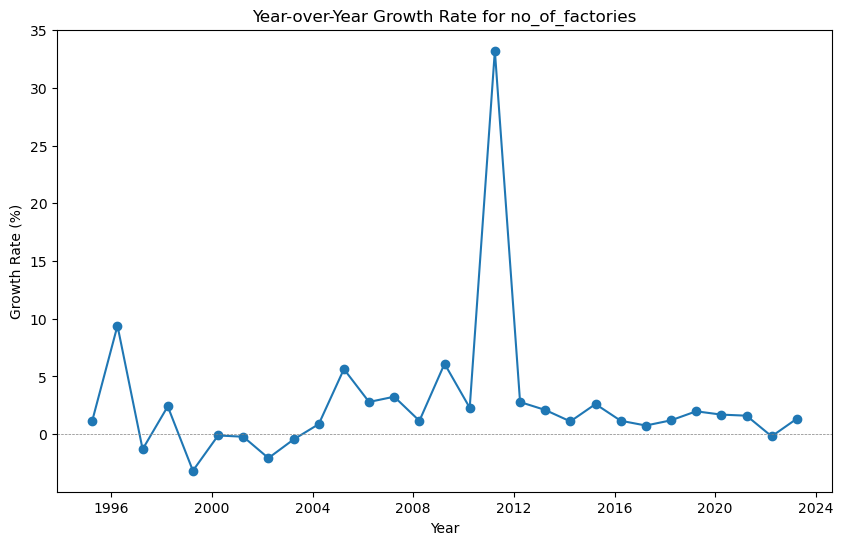

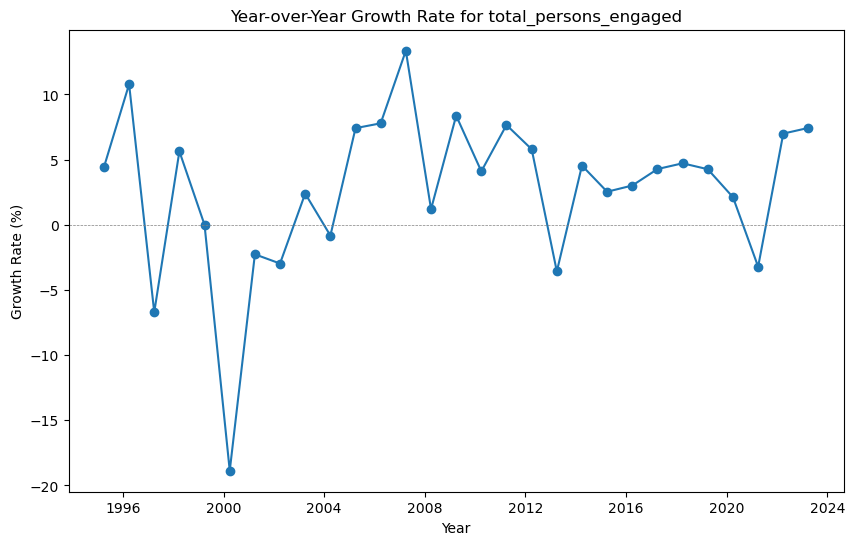

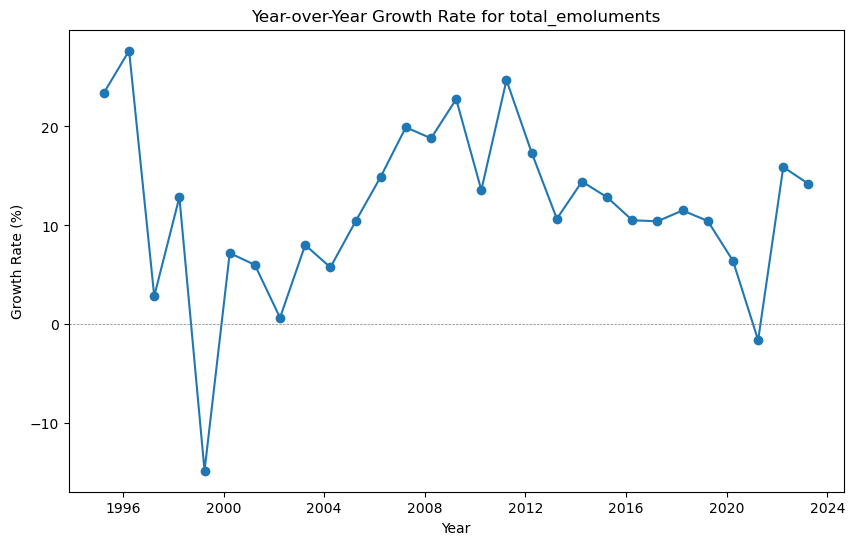

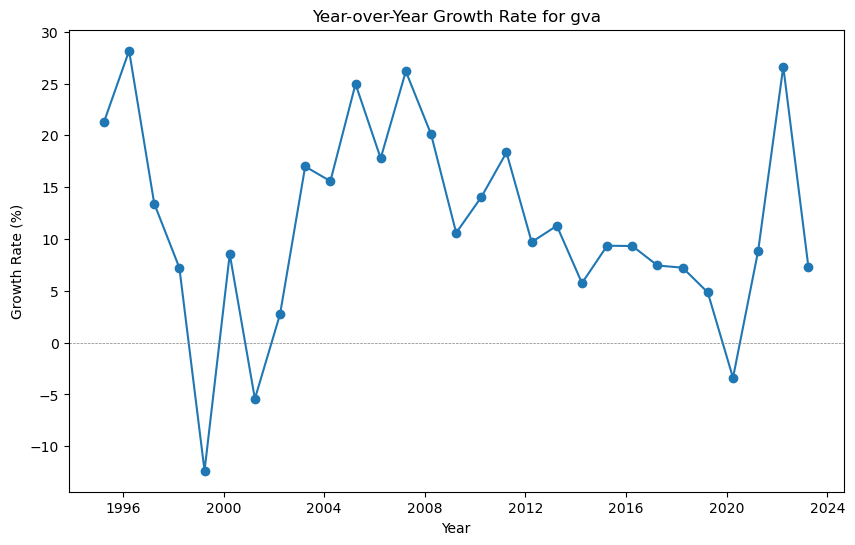

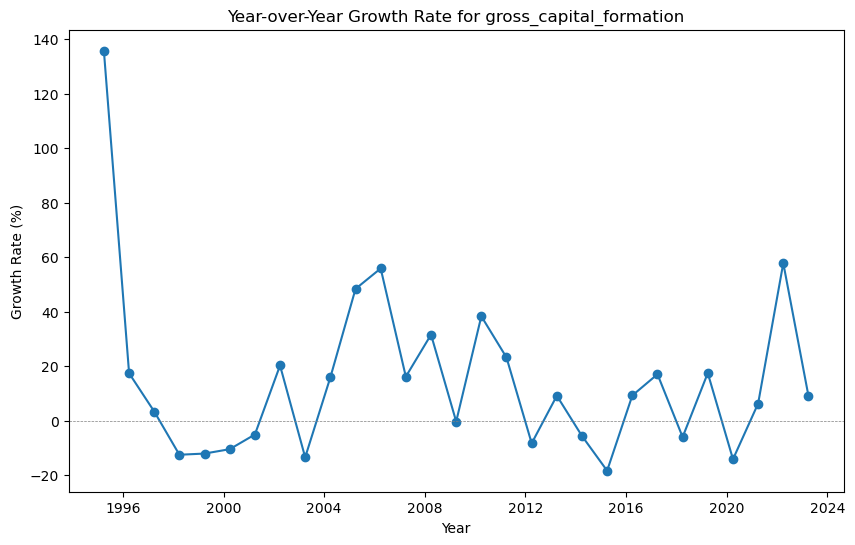

In [32]:
growth_rate_data = data.pct_change() * 100  # Convert to percentage

for column in ['no_of_factories', 'total_persons_engaged', 'total_emoluments', 'gva', 'gross_capital_formation']:
    plt.figure(figsize=(10, 6))
    plt.plot(growth_rate_data.index, growth_rate_data[column], marker = 'o', linestyle = '-')
    plt.title(f'Year-over-Year Growth Rate for {column}')
    plt.xlabel('Year')
    plt.ylabel(f'Growth Rate (%)')
    plt.axhline(0, color = 'gray', linestyle='--', linewidth = 0.5)
    plt.show()

# Step-6: Forecasting with ARIMA

## Defining the forecasting function with ARIMA

In [35]:
def forecast_arima(data, column, periods = 5):
    model = ARIMA(data[column], order = (1, 1, 1))
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=periods)

    plt.figure(figsize = (10, 6))
    plt.plot(data.index, data[column], label = f'Actual {column}', marker = 'o')
    plt.plot(pd.date_range(start=data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'ARIMA Forecast', linestyle = '--')
    plt.title(f'ARIMA Forecast for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    
    return forecast

## ARIMA Forecasted figures for next 3 years

C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\2029216943.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'ARIMA Forecast', linestyle = '--')


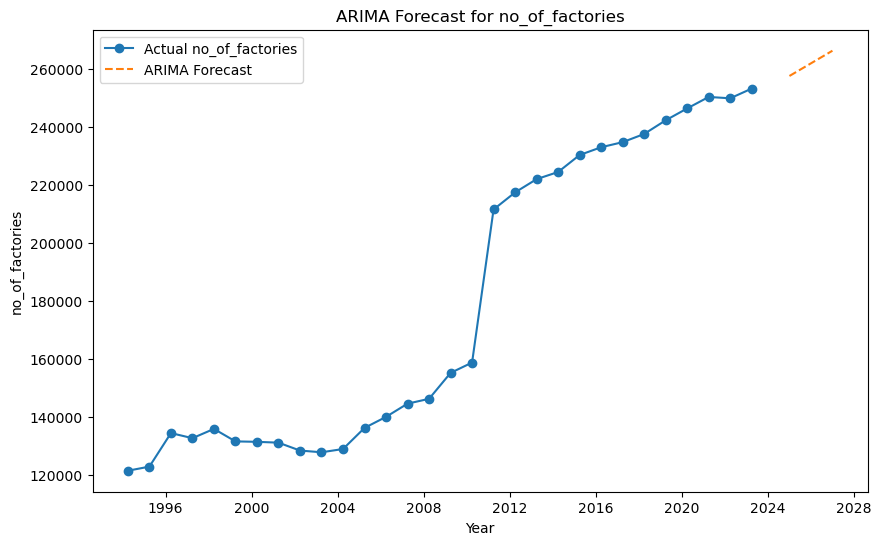

Exponential Smoothing Forecast for no_of_factories:
2024-03-31    257685.719535
2025-03-31    262037.406614
2026-03-31    266389.061237
Freq: YE-MAR, Name: predicted_mean, dtype: float64


C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Li

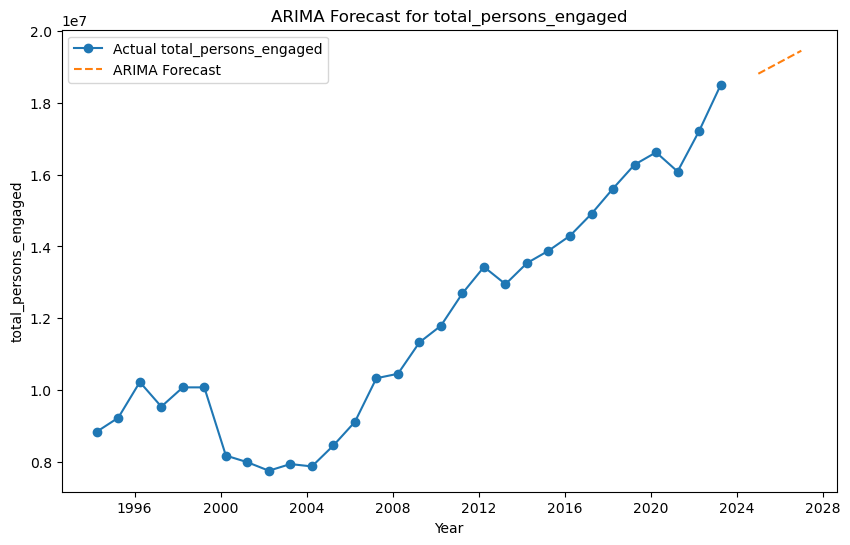

Exponential Smoothing Forecast for total_persons_engaged:
2024-03-31    1.881537e+07
2025-03-31    1.913577e+07
2026-03-31    1.945617e+07
Freq: YE-MAR, Name: predicted_mean, dtype: float64


C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\2029216943.py:8: FutureWarning: 'Y' is deprecated and w

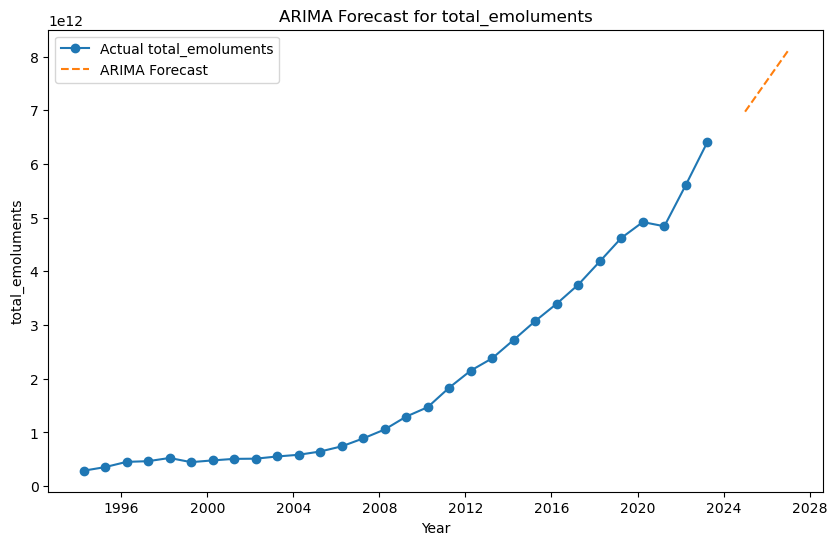

Exponential Smoothing Forecast for total_emoluments:
2024-03-31    6.972981e+12
2025-03-31    7.540745e+12
2026-03-31    8.108198e+12
Freq: YE-MAR, Name: predicted_mean, dtype: float64


C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\2029216943.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'ARIMA Forecast', linestyle = '--')


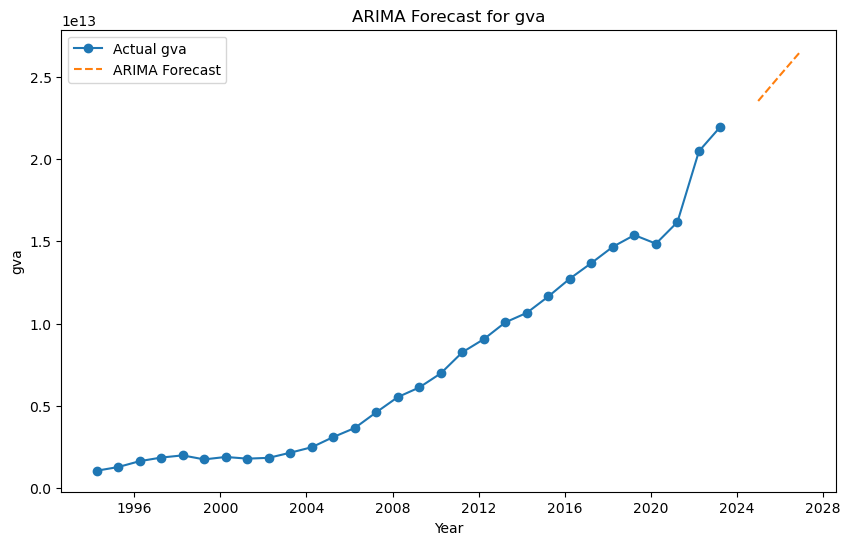

C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-i

Exponential Smoothing Forecast for gva:
2024-03-31    2.353457e+13
2025-03-31    2.507491e+13
2026-03-31    2.659193e+13
Freq: YE-MAR, Name: predicted_mean, dtype: float64


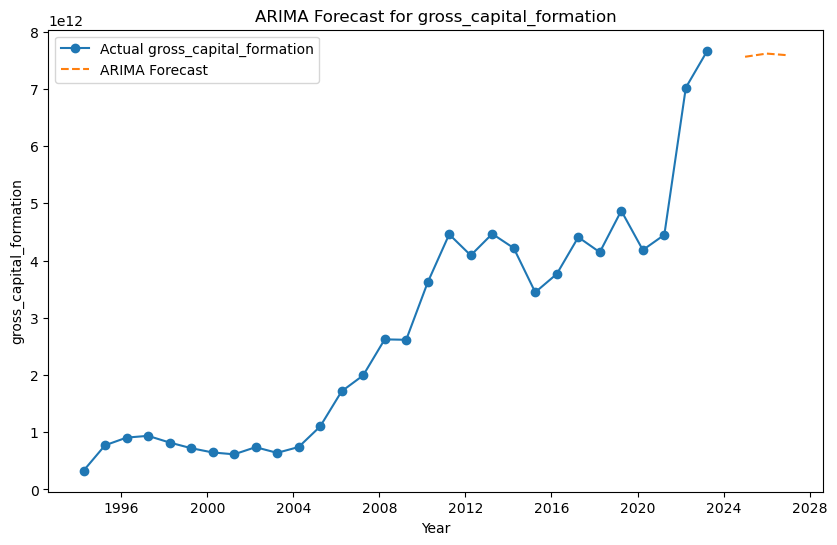

Exponential Smoothing Forecast for gross_capital_formation:
2024-03-31    7.562145e+12
2025-03-31    7.617961e+12
2026-03-31    7.588504e+12
Freq: YE-MAR, Name: predicted_mean, dtype: float64


In [37]:
forecast_periods = 3
forecasts_df = pd.DataFrame()

for column in ['no_of_factories', 'total_persons_engaged', 'total_emoluments', 'gva', 'gross_capital_formation']:
    fc_arima = forecast_arima(data, column, periods = forecast_periods)
    forecasts_df[column] = fc_arima

    print(f"Exponential Smoothing Forecast for {column}:\n{fc_arima}")

## Export the DataFrame to an Excel file

In [39]:
forecasts_df.reset_index(inplace = True)
forecasts_df.rename(columns = {'index': 'year_ending_on'}, inplace = True)
forecasts_df.to_excel('forecast_results_arima.xlsx', index=False)

# Step-7: Forecasting with Exponential Smoothing

## Defining the forecasting function with Exponential Smoothing

In [42]:
def forecast_exponential_smoothing(data, column, periods = 5):
    model = ExponentialSmoothing(data[column], trend = 'add', seasonal = None, initialization_method = "estimated")
    fitted_model = model.fit()
    forecast = fitted_model.forecast(periods)

    plt.figure(figsize = (10, 6))
    plt.plot(data.index, data[column], label = f'Actual {column}', marker = 'o')
    plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')
    plt.title(f'Exponential Smoothing Forecast for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    
    return forecast

## Exponential Smoothing Forecasted figures for next 3 years

C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\3515035056.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')


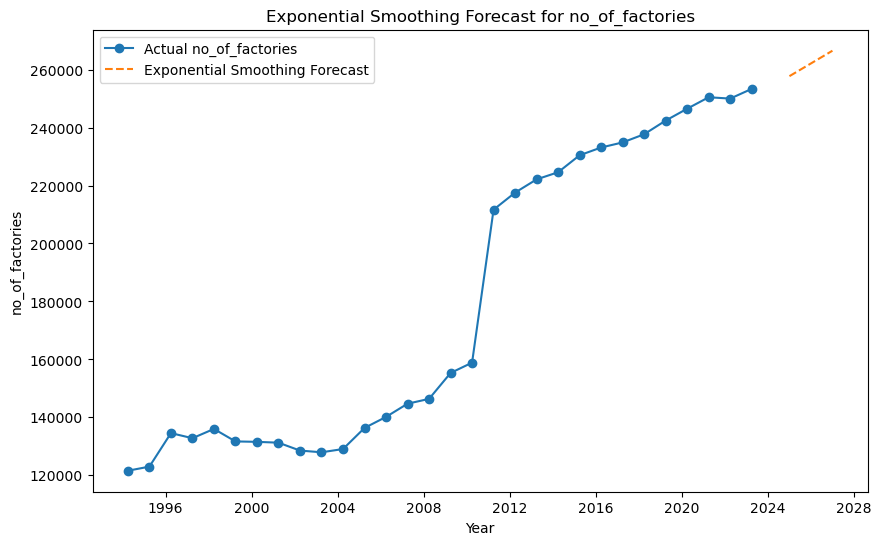

C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\3515035056.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')


Exponential Smoothing Forecast for no_of_factories:
2024-03-31    257727.470809
2025-03-31    262115.045588
2026-03-31    266502.620367
Freq: YE-MAR, dtype: float64


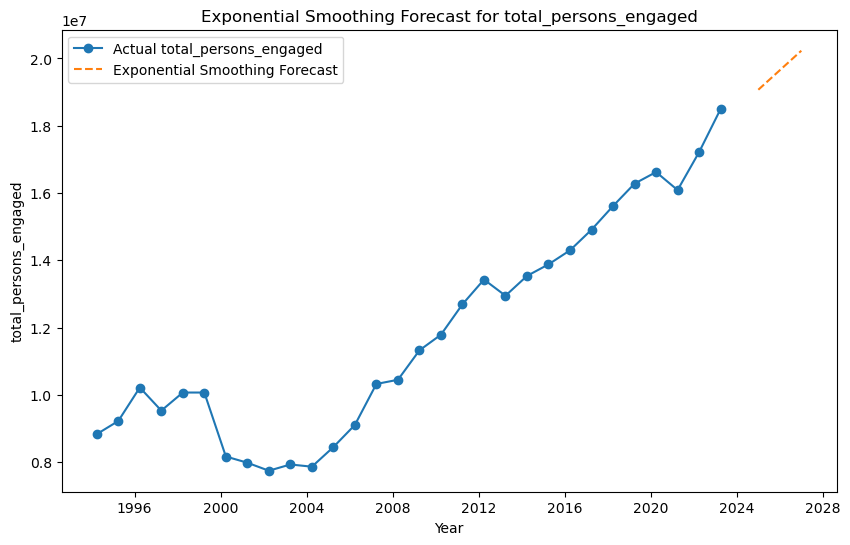

Exponential Smoothing Forecast for total_persons_engaged:
2024-03-31    1.907035e+07
2025-03-31    1.964995e+07
2026-03-31    2.022955e+07
Freq: YE-MAR, dtype: float64


C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\3515035056.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')


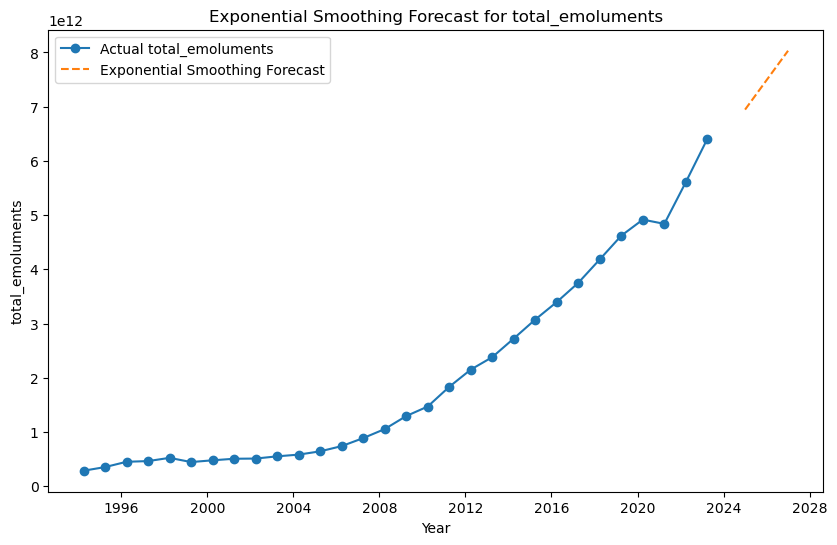

Exponential Smoothing Forecast for total_emoluments:
2024-03-31    6.945841e+12
2025-03-31    7.488760e+12
2026-03-31    8.031679e+12
Freq: YE-MAR, dtype: float64


C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\3515035056.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')


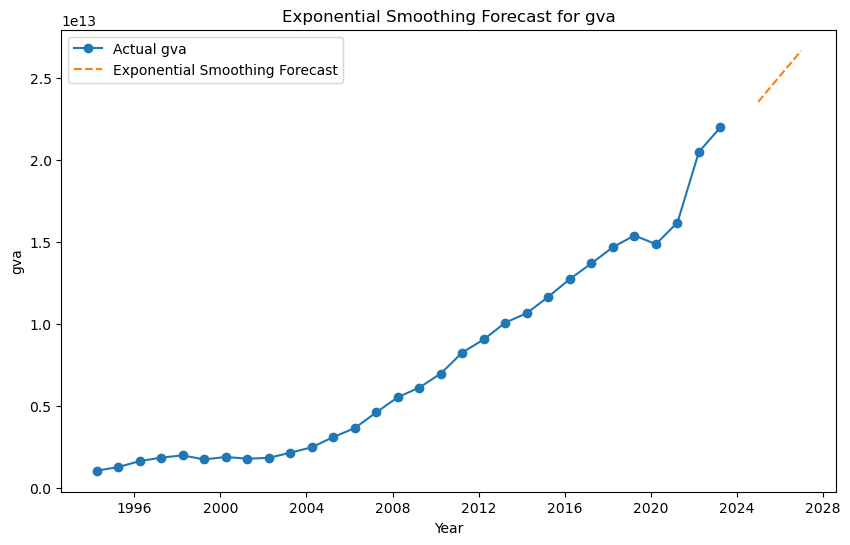

C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-MAR will be used.
  self._init_dates(dates, freq)
C:\Users\Nilotpal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Nilotpal\AppData\Local\Temp\ipykernel_3904\3515035056.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start = data.index[-1], periods = periods + 1, freq = 'Y')[1:], forecast, label = 'Exponential Smoothing Forecast', linestyle = '--')


Exponential Smoothing Forecast for gva:
2024-03-31    2.352721e+13
2025-03-31    2.508355e+13
2026-03-31    2.663989e+13
Freq: YE-MAR, dtype: float64


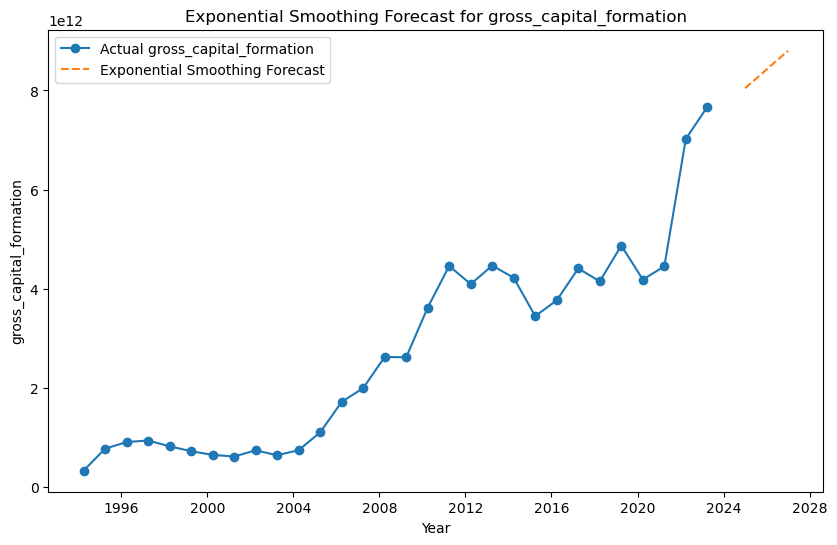

Exponential Smoothing Forecast for gross_capital_formation:
2024-03-31    8.044661e+12
2025-03-31    8.422959e+12
2026-03-31    8.801256e+12
Freq: YE-MAR, dtype: float64


In [44]:
forecast_periods = 3
forecasts_df = pd.DataFrame()

for column in ['no_of_factories', 'total_persons_engaged', 'total_emoluments', 'gva', 'gross_capital_formation']:
    fc_exps = forecast_exponential_smoothing(data, column, periods = forecast_periods)
    forecasts_df[column] = fc_exps

    print(f"Exponential Smoothing Forecast for {column}:\n{fc_exps}")

## Export the DataFrame to an Excel file

In [46]:
forecasts_df.reset_index(inplace = True)
forecasts_df.rename(columns = {'index': 'year_ending_on'}, inplace = True)
forecasts_df.to_excel('forecast_results_exps.xlsx', index=False)